**week_three**

Neutral network classification with pytoch.

In [5]:
#let start with importing ibraries
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [6]:
#question no 1
#Make a binary classification dataset with Scikit-Learn's make_moons() function.
#For consistency, the dataset should have 1000 samples and a random_state=42.
#Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing

from sklearn.datasets import make_moons
number_sample = 1000
random_seed = 42

X, y = make_moons(n_samples = number_sample,
                  noise = 0.7,
                  random_state = random_seed
                  )
X[:10], y[:10]

(array([[-0.41265088,  0.90034929],
        [ 1.69581437,  0.04324173],
        [ 0.43388841,  1.20548173],
        [-0.77329492, -1.06824606],
        [-0.73160154,  0.588693  ],
        [ 0.90653202,  0.70571117],
        [ 0.21458415, -0.13303894],
        [-0.4128138 ,  0.83007621],
        [ 1.41312977, -0.49497562],
        [ 1.03573138,  1.47981929]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [7]:
#import the pandas libraires to make the dataframe
import pandas as pd
df = pd.DataFrame({"X0": X[:, 0],
                   "X1": X[:, 1],
                   'y': y})
df.head()

,X0,X1,y
0,-0.412651,0.900349,1
1,1.695814,0.043242,1
2,0.433888,1.205482,1
3,-0.773295,-1.068246,1
4,-0.731602,0.588693,0


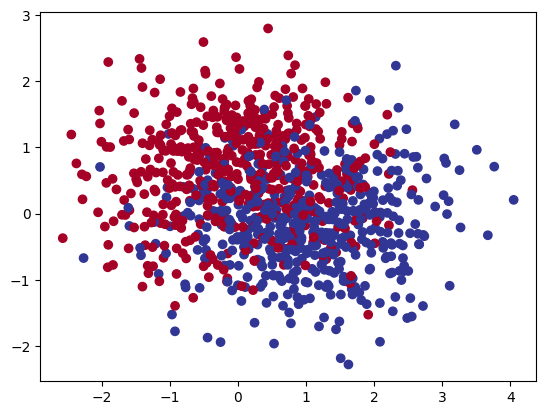

In [8]:
#for better understanding of the dataset, let visualize the data data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [9]:
#converitng the  data into tensor
X = torch.tensor(X, dtype = torch.float)
y = torch.tensor(y, dtype = torch.float)

#splitting the dataset into train test split into 80% 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = random_seed
)
#let display the length of the train and test split data
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [10]:
#Build a model by subclassing nn.Module that incorporates non-linear activation functions
#and is capable of fitting the data you created in 1.
#Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_unit):
        super().__init__()
        self.layer1 = nn.Linear(in_features=in_features, out_features=hidden_unit)
        self.layer2 = nn.Linear(in_features=hidden_unit, out_features=out_features)

        self.relu = nn.ReLU()

    def forward(self, x):

        return self.layer2(self.relu(self.layer1(x)))

model_0 = MoonModelV0(in_features=2, out_features=1, hidden_unit=10).to(device)


In [11]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.2410,  0.1037],
                      [ 0.2074,  0.4284],
                      [-0.6705,  0.4242],
                      [-0.4359,  0.5731],
                      [ 0.6686, -0.3908],
                      [-0.4659,  0.0726],
                      [ 0.4578, -0.6638],
                      [-0.4334,  0.5811],
                      [-0.4741,  0.4174],
                      [-0.2770, -0.1296]])),
             ('layer1.bias',
              tensor([-0.6291, -0.5554, -0.6522, -0.6342, -0.6192,  0.2047, -0.4067,  0.0371,
                       0.3418,  0.6834])),
             ('layer2.weight',
              tensor([[ 0.2440, -0.1491, -0.1323,  0.0031,  0.0475,  0.0206,  0.0197,  0.2516,
                        0.2046, -0.0397]])),
             ('layer2.bias', tensor([0.2873]))])

In [12]:
#Setup a binary classification compatible loss function and optimizer to use when training the model
loss_fun = nn.BCEWithLogitsLoss()

optimizers = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [13]:
#Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
#To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
#Train the model for long enough for it to reach over 96% accuracy.
#The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

# Prediction probabilities
print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([0.2988, 0.7396, 0.7844, 0.5585, 0.3040, 0.4668, 0.2849, 0.2814, 0.2979,
        0.3661], grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.5742, 0.6769, 0.6866, 0.6361, 0.5754, 0.6146, 0.5708, 0.5699, 0.5739,
        0.5905], grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)


In [14]:
# Let's know the accuracy
!pip -q install torchmetrics # install the torchmetrics
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 4.7 MB/s eta 0:00:00


MulticlassAccuracy()

In [15]:
torch.manual_seed(random_seed)

epochs=1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  # print(y_logits[:5]) # model raw outputs are "logits"
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fun(y_logits, y_train)
  acc = acc_fn(y_pred, y_train.int())

  # 3. Zero the gradients
  optimizers.zero_grad()

  # 4. Loss backward (perform backpropagation)
  loss.backward()

  # 5. Step the optimizer (gradient descent)
  optimizers.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Caculate the loss/acc
    test_loss = loss_fun(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test.int())

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.76 Acc: 0.50 | Test loss: 0.75 Test acc: 0.50
Epoch: 100 | Loss: 0.50 Acc: 0.76 | Test loss: 0.53 Test acc: 0.71
Epoch: 200 | Loss: 0.48 Acc: 0.77 | Test loss: 0.52 Test acc: 0.74
Epoch: 300 | Loss: 0.48 Acc: 0.77 | Test loss: 0.52 Test acc: 0.74
Epoch: 400 | Loss: 0.48 Acc: 0.77 | Test loss: 0.52 Test acc: 0.74
Epoch: 500 | Loss: 0.48 Acc: 0.77 | Test loss: 0.52 Test acc: 0.75
Epoch: 600 | Loss: 0.48 Acc: 0.76 | Test loss: 0.52 Test acc: 0.75
Epoch: 700 | Loss: 0.48 Acc: 0.76 | Test loss: 0.52 Test acc: 0.75
Epoch: 800 | Loss: 0.48 Acc: 0.76 | Test loss: 0.52 Test acc: 0.75
Epoch: 900 | Loss: 0.48 Acc: 0.76 | Test loss: 0.52 Test acc: 0.75


In [16]:
# question no 5
import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")


    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

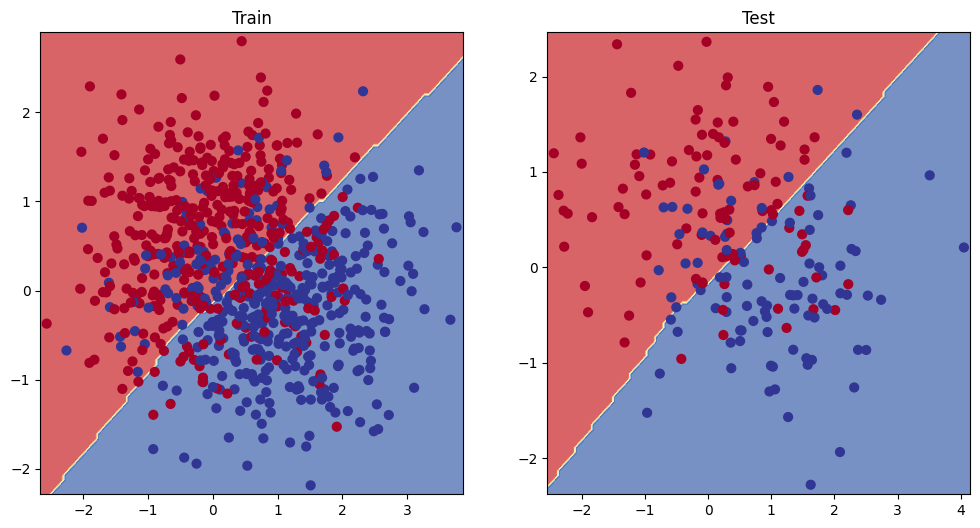

In [17]:
#to plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


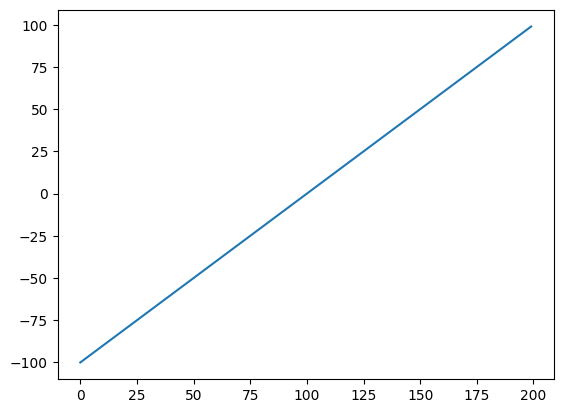

In [18]:
#Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
#Feel free to reference the ML cheatsheet website for the formula.
tensor_A = torch.arange(-100, 100, 1)
plt.plot(tensor_A)

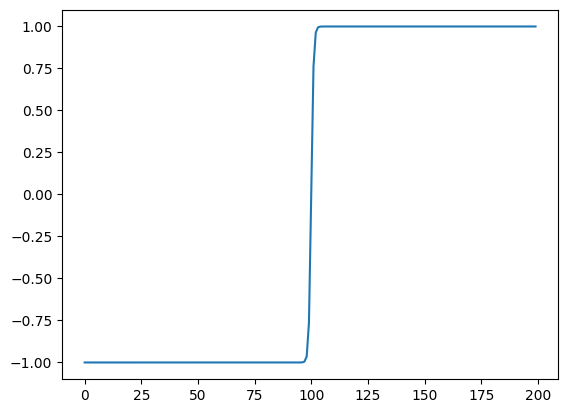

In [19]:
plt.plot(torch.tanh(tensor_A))

question seven

Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).

    * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
    * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
    * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
    * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.


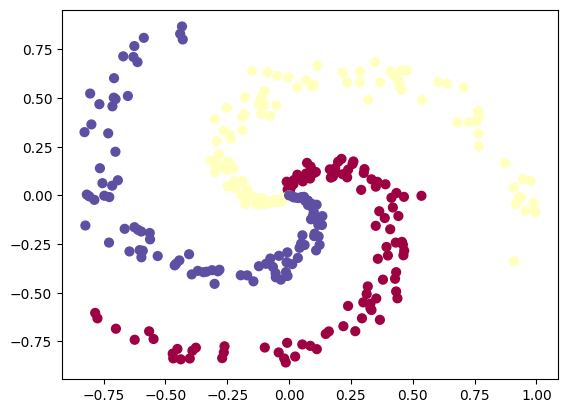

In [21]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [22]:
# convert data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = random_seed
)
#let display the length of the train and test split data
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [24]:
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [25]:
#create the model or device
device = "cuda" if torch.cuda.is_available() else "cpu"

class SpiralModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

model_1 = SpiralModel().to(device)
model_1

SpiralModel(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [26]:
# Setup data to be device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Print out untrained model outputs
print("Logits:")
print(model_1(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_1(X_train)[:10], dim=1))

print("Pred labels:")
print(torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1))


torch.float32 torch.float32 torch.int64 torch.int64
Logits:
tensor([[-0.2160, -0.0600,  0.2256],
        [-0.2020, -0.0531,  0.2255],
        [-0.2226, -0.0606,  0.2384],
        [-0.2185, -0.0493,  0.2930],
        [-0.2200, -0.0490,  0.2781],
        [-0.2201, -0.0567,  0.2462],
        [-0.2206, -0.0578,  0.2435],
        [-0.2210, -0.0623,  0.2290],
        [-0.2041, -0.0535,  0.2266],
        [-0.2180, -0.0533,  0.2919]], grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.2685, 0.3139, 0.4176],
        [0.2707, 0.3142, 0.4151],
        [0.2658, 0.3126, 0.4216],
        [0.2596, 0.3075, 0.4329],
        [0.2610, 0.3096, 0.4294],
        [0.2651, 0.3122, 0.4227],
        [0.2654, 0.3124, 0.4222],
        [0.2674, 0.3133, 0.4193],
        [0.2702, 0.3141, 0.4157],
        [0.2601, 0.3067, 0.4332]], grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [27]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.02)

In [28]:
# Build a model and specifying the loop for it
epochs = 1000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.12 Acc: 0.32 | Test loss: 1.10 Test acc: 0.37
Epoch: 100 | Loss: 0.41 Acc: 0.79 | Test loss: 0.55 Test acc: 0.65
Epoch: 200 | Loss: 0.14 Acc: 0.96 | Test loss: 0.30 Test acc: 0.95
Epoch: 300 | Loss: 0.07 Acc: 0.98 | Test loss: 0.15 Test acc: 0.98
Epoch: 400 | Loss: 0.04 Acc: 0.99 | Test loss: 0.22 Test acc: 0.98
Epoch: 500 | Loss: 0.03 Acc: 0.99 | Test loss: 0.25 Test acc: 0.98
Epoch: 600 | Loss: 0.02 Acc: 0.99 | Test loss: 0.27 Test acc: 0.98
Epoch: 700 | Loss: 0.02 Acc: 0.99 | Test loss: 0.29 Test acc: 0.98
Epoch: 800 | Loss: 0.02 Acc: 0.99 | Test loss: 0.35 Test acc: 0.98
Epoch: 900 | Loss: 0.02 Acc: 0.99 | Test loss: 0.32 Test acc: 0.98


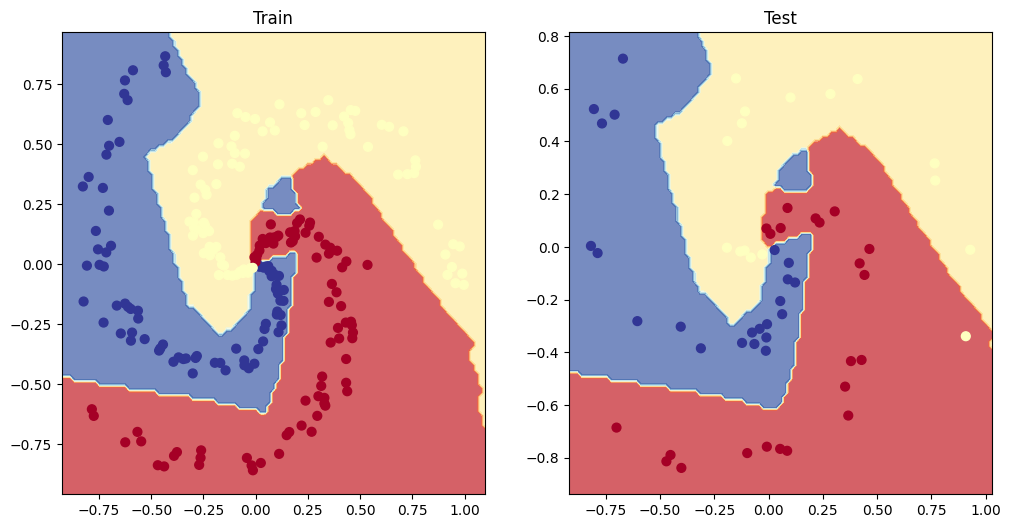

In [29]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
